

Problem Statement

The objective of this task is to build and visualize a Decision Tree model using Scikit-learn to classify data based on input features. The model should predict the target class and evaluate its performance using appropriate metrics.



 Dataset Description

The Wine Quality dataset is used for this task.

* Contains physicochemical properties of red wine samples.
* Features include:



  * Fixed acidity
  * Volatile acidity
  * Citric acid
  * Residual sugar
  * Chlorides
  * Free sulfur dioxide
  * Total sulfur dioxide
  * Density
  * pH
  * Sulphates
  * Alcohol
* Target variable:
* Wine Quality (converted into binary classification: Good / Bad)

The dataset was preprocessed to convert quality scores into binary labels:

* Quality ≥ 6 → Good (1)
* Quality < 6 → Bad (0)


Methodology

1. Loaded the dataset using Pandas.
2. Separated features (X) and target (y).
3. Split data into training and testing sets (80% training, 20% testing).
4. Built a Decision Tree Classifier using Scikit-learn.
5. Trained the model on training data.
6. Evaluated performance using:

   * Accuracy
   * Confusion Matrix
   * Classification Report
7. Visualized the Decision Tree structure.


Results

* The model successfully classified wine samples into Good and Bad categories.
* Achieved good accuracy on the test dataset.
* The confusion matrix showed correct classification for most samples.
* The tree visualization helped understand decision rules clearly.


Conclusion

A Decision Tree classifier was successfully implemented and evaluated.
The model effectively classified wine quality based on chemical properties.
Decision Trees are easy to interpret and suitable for classification tasks, but may overfit if not properly tuned.


c:\Users\sathvik\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


Dataset Shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

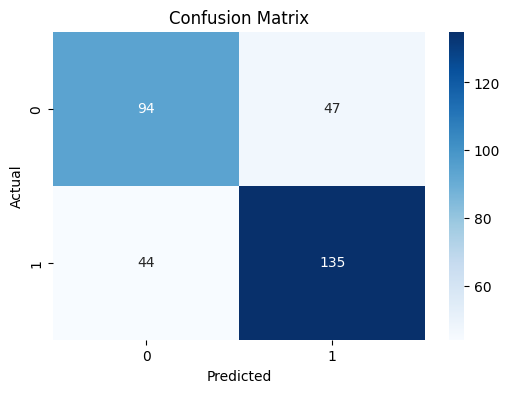

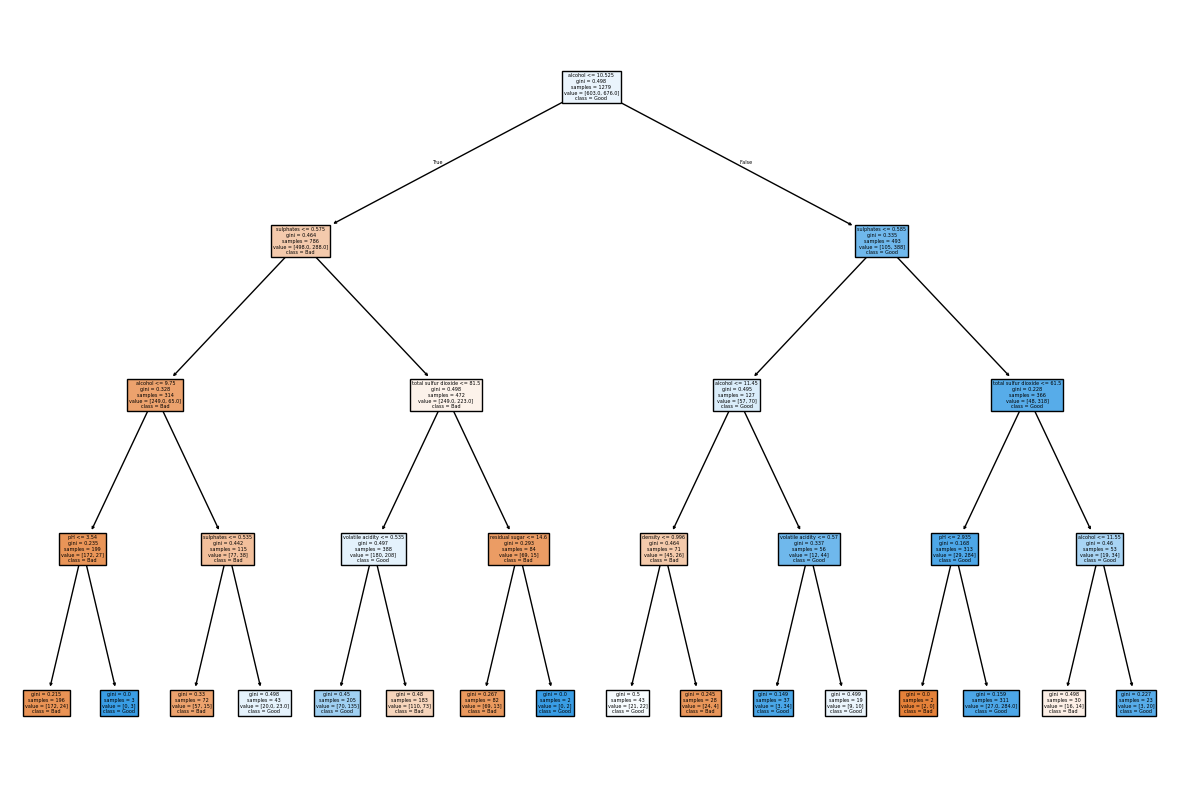

In [1]:
# Task 1 - Decision Tree Implementation (Wine Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("winequality-red.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Features and Target
X = df.drop("quality", axis=1)
y = df["quality"]

# Convert quality to classification (Good / Bad)
y = y.apply(lambda x: 1 if x >= 6 else 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=["Bad","Good"], filled=True)
plt.show()
